## Case Study -
## Data : Wine Quality data

## One of the wine production company is looking for the Rating solution to rate 
## different varieties of its white wines on the scale of 3 to 9, where 3 is the 
## poor quality and 9 is the most superior quality of the wine, they want to 
## consider all the available properties of the wines to make this decision
## The main objective is to find the significant attributes and use their relation
## with wine quality to come up with wine Ratings.

## Dependent variable - Wine quality (3-9)
## Independent variables - All other


In [9]:
import pandas as pd
import numpy as np

In [10]:
data = pd.read_csv("winequality-white.csv",sep=';')

In [11]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [14]:
object_cols = list(data.select_dtypes(include=['category','object']))

In [15]:
object_cols

[]

In [16]:
data.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

## 1.3 Feature Scaling

In [20]:
from sklearn import preprocessing

In [21]:
data_scaled = preprocessing.scale(data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]])

In [19]:
data_scaled

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [22]:
data1 = pd.DataFrame(data_scaled).join(data['quality'])

In [24]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,10,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,6
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,6
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,6
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6


In [25]:
data1.columns = data.columns

In [27]:
data = data1


#### 1.4 Splitting data into Training and Test Data Sets

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [33]:
data_X = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]

In [34]:
data_y = data[:]['quality']

In [35]:
X_train, X_test,Y_train,Y_test = train_test_split(data_X, data_y, test_size = 0.3, random_state = 1000)

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 3183 to 1459
Data columns (total 11 columns):
fixed acidity           3428 non-null float64
volatile acidity        3428 non-null float64
citric acid             3428 non-null float64
residual sugar          3428 non-null float64
chlorides               3428 non-null float64
free sulfur dioxide     3428 non-null float64
total sulfur dioxide    3428 non-null float64
density                 3428 non-null float64
pH                      3428 non-null float64
sulphates               3428 non-null float64
alcohol                 3428 non-null float64
dtypes: float64(11)
memory usage: 321.4 KB


In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 2290 to 3831
Data columns (total 11 columns):
fixed acidity           1470 non-null float64
volatile acidity        1470 non-null float64
citric acid             1470 non-null float64
residual sugar          1470 non-null float64
chlorides               1470 non-null float64
free sulfur dioxide     1470 non-null float64
total sulfur dioxide    1470 non-null float64
density                 1470 non-null float64
pH                      1470 non-null float64
sulphates               1470 non-null float64
alcohol                 1470 non-null float64
dtypes: float64(11)
memory usage: 137.8 KB


In [48]:
Y_test.head()

2290    7
3073    5
2984    6
2701    5
1161    6
Name: quality, dtype: int64

In [43]:
import seaborn as sns

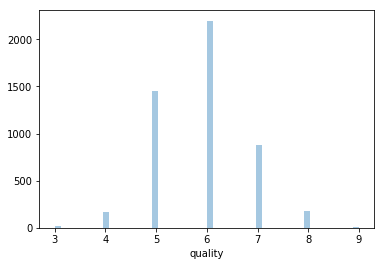

In [44]:
sns.distplot(data.quality, kde = False)

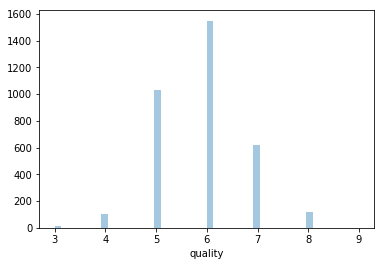

In [46]:
sns.distplot(Y_train,kde=False)

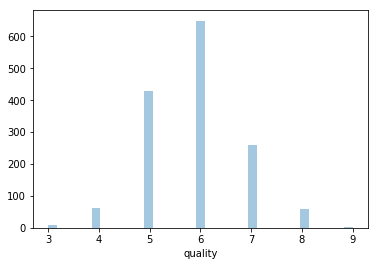

In [47]:
sns.distplot(Y_test,kde=False)


## 1.5 Feature Selection 

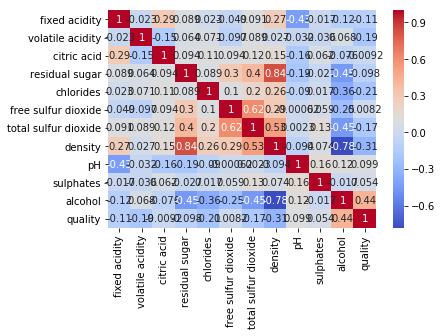

In [49]:
cr = data.corr()

cr['quality']

sns.heatmap(cr,annot=True,cmap="coolwarm")


## Conclusion - Selected independent variables :  All

## Building Classification Model

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf_clf = RandomForestRegressor(n_estimators=5, max_features='auto', random_state=0)

In [52]:
rf_clf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


# Train the model using the training sets

In [54]:
rf_clf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [55]:
y_pred = rf_clf.predict(X_test)

In [56]:
y_pred

array([5.6, 7. , 5.2, ..., 6.6, 5.8, 5.2])

In [57]:
y_pred=np.round(y_pred)

In [58]:
y_pred

array([6., 7., 5., ..., 7., 6., 5.])

In [60]:
res = pd.DataFrame({'y_act':Y_test,'y_pred':y_pred})

In [61]:
res

,y_act,y_pred
2290,7,6.0
3073,5,7.0
2984,6,5.0
2701,5,5.0
1161,6,6.0
3064,5,5.0
350,7,6.0
3387,5,5.0
2479,6,6.0
3436,6,6.0



## 1.7 Model Evaluation - Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix


cnf_matrix = confusion_matrix(Y_test, y_pred)


print(cnf_matrix)

[[  0   0   6   4   0   0   0]
 [  0   3  43  13   3   0   0]
 [  1   6 273 134  14   0   0]
 [  0   1 114 457  77   0   0]
 [  0   0  10  96 151   3   0]
 [  0   0   2  15  21  20   0]
 [  0   0   0   0   3   0   0]]


In [65]:
## RMSE


import math

math.sqrt(((Y_test-y_pred)**2).mean())

0.7500566872001112




## Analyze the errors visually


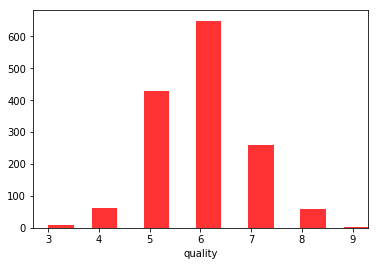

In [66]:
sns.distplot(Y_test,kde=False,

             hist_kws={"width":0.5,"alpha": 0.8, "color": "r"}

                       )


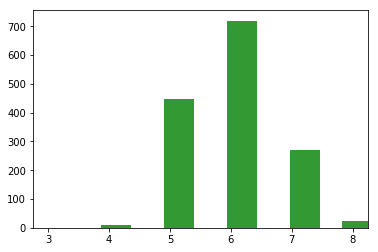

In [67]:
sns.distplot(y_pred,kde=False,

             hist_kws={"width":0.5,"alpha": 0.8, "color": "g"}

                       )